In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import sys
sys.path.append("../subjective-fits/")
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Comparing approaches to subjective probability and statistics

We illustrate various approaches to statistics based on subjective probability. Our test case is the estimation of the mean of a one-dimensional Gaussian, both using a point estimate and an "uncertainty" interval. Both the mathematical guarantees as well as the interpretation of these two outputs differ for each approach, we will comment on that.

The setting is $x_1,\dots,x_N\sim\mathcal{N}(\mu,\sigma^2)$, with $\sigma^2$ known. The statistician's goal is to infer $\mu$.

In [2]:
def generateData(N, mu, sigma2, tag="well-specified"):
    if tag=="well-specified":
        return mu+np.sqrt(sigma2)*npr.randn(N)

In [3]:
npr.seed(1)
muTrue = 1
sigma2True = 1
alpha = .05
N = 100
x = generateData(N, muTrue, sigma2True)

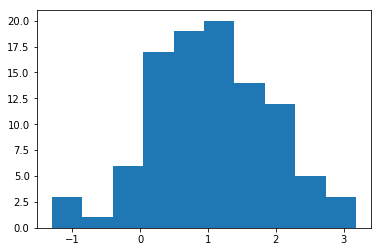

In [4]:
plt.hist(x)
plt.show()

## Conjugate Bayes

In [18]:
import ConjugateBayes as cb
cb = cb.ConjugateBayes(data=x, sigma2Lhd=sigma2True**2, muPrior=10, sigma2Prior=10)
print(cb.estimate())
print(cb.interval(1-alpha))
print(np.mean(cb.interval(1-alpha))==cb.estimate())

1.0695133387369615
(0.8736148650447291, 1.265411812429194)
True


1.0695133387369615
